In [1]:
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsforecast import StatsForecast
from statsforecast.models import ARIMA
from statsforecast.utils import ConformalIntervals

In [ ]:
HORIZON = 7

dataset = pd.read_csv(
    "../assets/daily_multivariate_timeseries.csv",
    parse_dates=["datetime"]
)

In [3]:
series = dataset[["Incoming Solar"]].reset_index()
series["id"] = "Solar"
series = series.rename(
    columns={"index": "ds", "Incoming Solar": "y", "id": "unique_id"}
)

In [4]:
train, test = train_test_split(series, test_size=HORIZON, shuffle=False)


In [5]:
intervals = ConformalIntervals(h=HORIZON)

In [7]:
models = [
    ARIMA(
        order=(2, 0, 2), 
        season_length=365, 
        prediction_intervals=intervals
        )
]

In [11]:
train.tail()

,ds,y,unique_id
2180,2180,5306.0,Solar
2181,2181,5160.2,Solar
2182,2182,2581.0,Solar
2183,2183,1592.0,Solar
2184,2184,4113.6,Solar


In [13]:
sf = StatsForecast(
    models=models,
    freq=1,
)

forecasts = sf.forecast(h=HORIZON, df=train, level=[95])
model = "ARIMA"

trainl = train.tail(90)

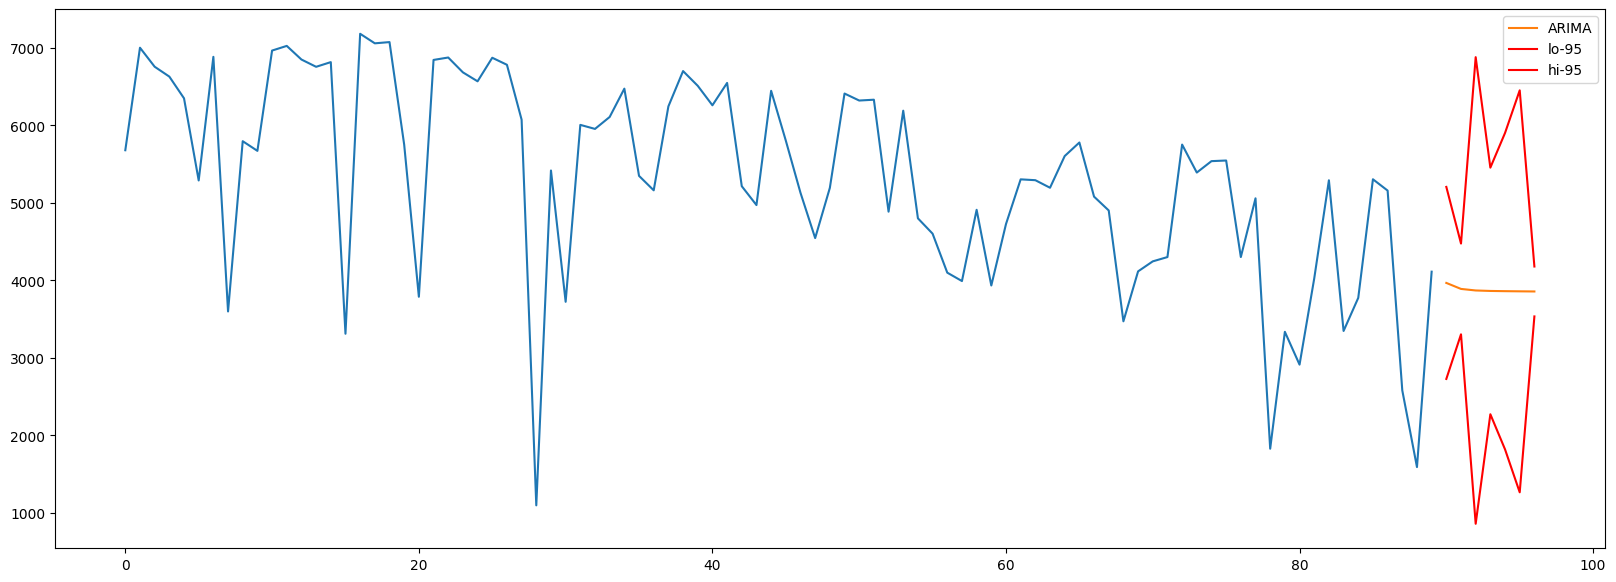

In [14]:


fig, ax = plt.subplots(1, 1, figsize=(20, 7))
plt.plot(np.arange(0, len(trainl["y"])), trainl["y"])
plt.plot(
    np.arange(len(trainl["y"]), len(trainl["y"]) + HORIZON),
    forecasts[model],
    label=model,
)
plt.plot(
    np.arange(len(trainl["y"]), len(trainl["y"]) + HORIZON),
    forecasts[f"{model}-lo-95"],
    color="r",
    label="lo-95",
)
plt.plot(
    np.arange(len(trainl["y"]), len(trainl["y"]) + HORIZON),
    forecasts[f"{model}-hi-95"],
    color="r",
    label="hi-95",
)
plt.legend()
plt.show()